In [1]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggridges’ was built under R version 3.4.4”Warning message:
“package ‘ggthemes’ was built under R version 3.4.4”
Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths



In [3]:
agg_data_path = '/Users/Krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
setwd(agg_data_path)

In [4]:
clean_df <- read.csv("cleaned_probC_data_test.csv")
colnames(clean_df)[1] <- 'trial'
sparse_df <- clean_df[,c("trial", "ID","condition","rt","accuracy")]
raw_df <- read.csv("raw_probC_data_test.csv")
colnames(raw_df)[1] <- 'trial'

In [5]:
#will need to add cps and etc. was sparse for the hddm estimates. 
simulations <- read.csv("600t_simulations.csv")
colnames(simulations)[2] <- 'accuracy'
colnames(simulations)[6] <- 'condition'
colnames(simulations)[5] <- 'ID'
simulations$trial <- rep(seq(1,600),50)

In [6]:
head(sparse_df)
head(raw_df)

trial,ID,condition,rt,accuracy
0,762,lv,0.7982922,1
1,762,lv,0.2879951,1
2,762,lv,0.3190770,1
3,762,lv,0.2818131,0
4,762,lv,0.3051300,0
5,762,lv,0.2408690,1


trial,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition
0,1,1,1,5,604,0.7982922,2.332758,0.5343237,0,0,112,762,lv
1,0,1,0,3,606,0.2879951,1.547891,0.2658880,0,0,112,762,lv
2,0,1,0,2,607,0.3190770,2.034690,0.7168515,0,0,112,762,lv
3,0,0,1,0,606,0.2818131,1.616035,0.3333358,0,1,111,762,lv
4,0,0,1,0,605,0.3051300,1.998192,0.6979176,0,1,112,762,lv
5,1,1,1,4,608,0.2408690,1.685035,0.4665551,0,1,111,762,lv


In [7]:
simulations %>% 
group_by(condition) %>%
summarise(sim_mean_acc = mean(accuracy), sim_std_acc = sd(accuracy))

condition,sim_mean_acc,sim_std_acc
hc,0.5216000,0.4995415
hv,0.5271333,0.4992716
lc,0.6463000,0.4781254
lv,0.5961000,0.4906861


In [8]:
sim_plt <- ggplot(simulations[0:500,], aes(trial, accuracy, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition) + ggtitle('Accuracy')

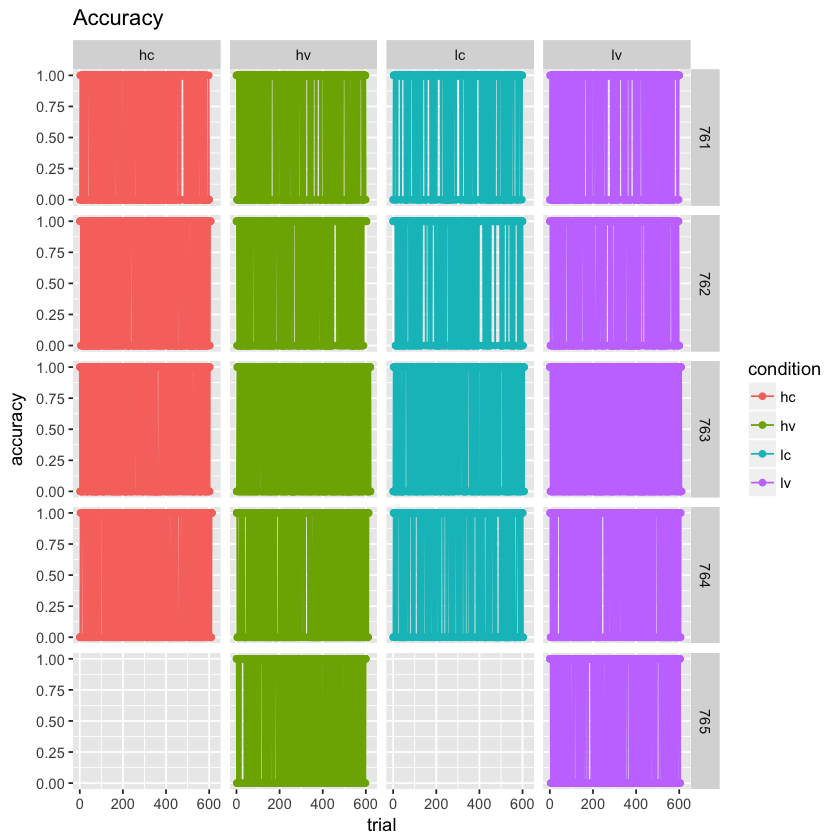

In [9]:
ggplot(sparse_df, aes(trial, accuracy, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition ) + ggtitle('Accuracy')

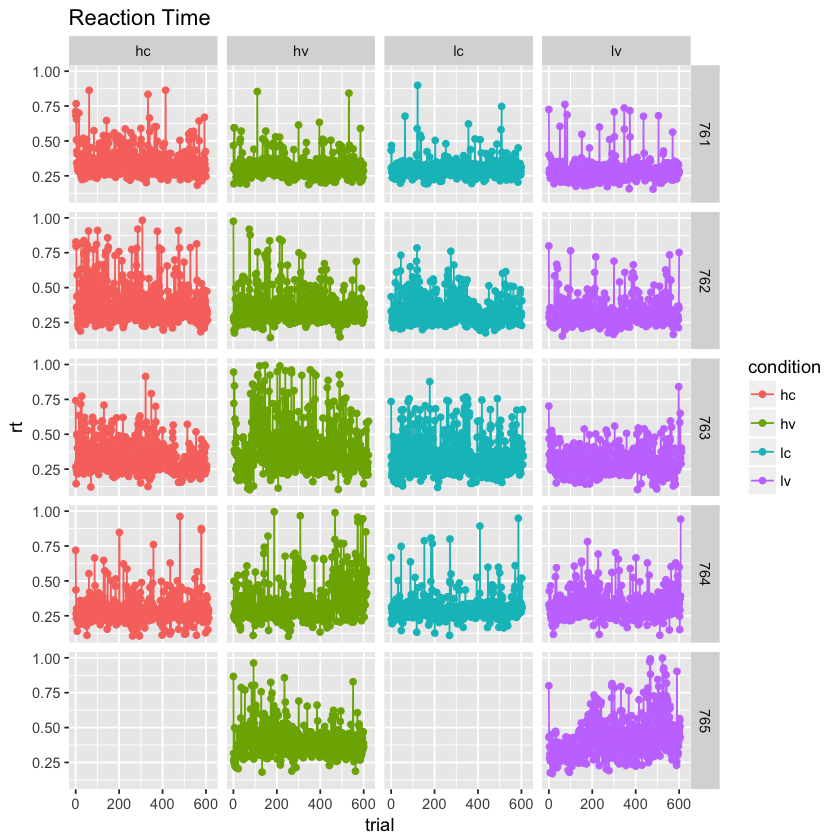

In [10]:
ggplot(sparse_df, aes(trial, rt, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition) + ggtitle('Reaction Time')

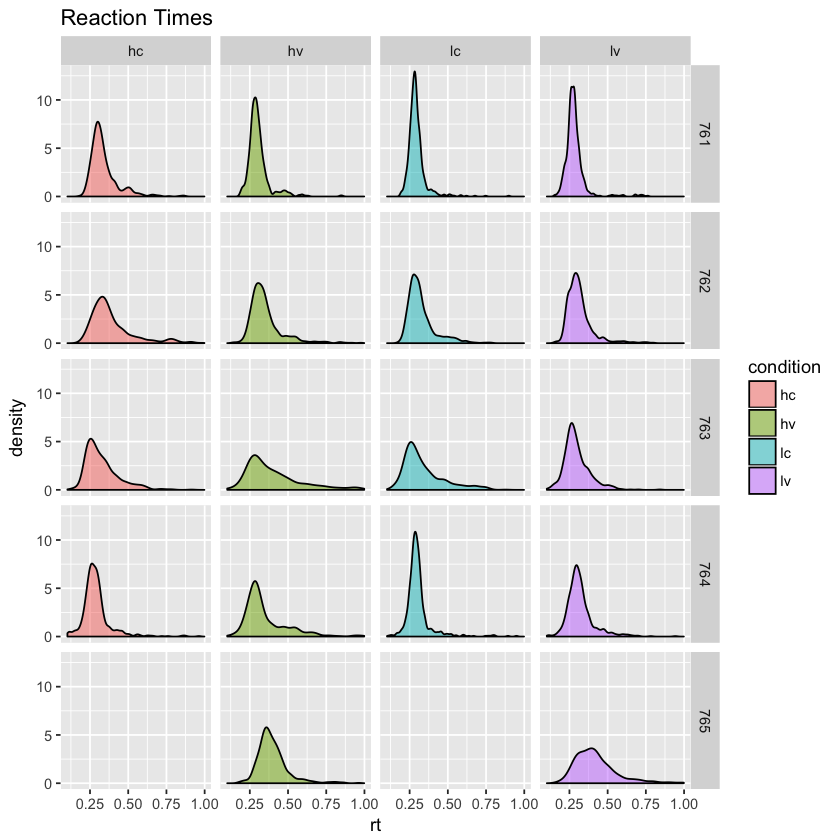

In [11]:
ggplot(sparse_df, aes(rt, fill=condition)) +
geom_density(alpha=0.5) + facet_grid(ID ~ condition) + ggtitle('Reaction Times')

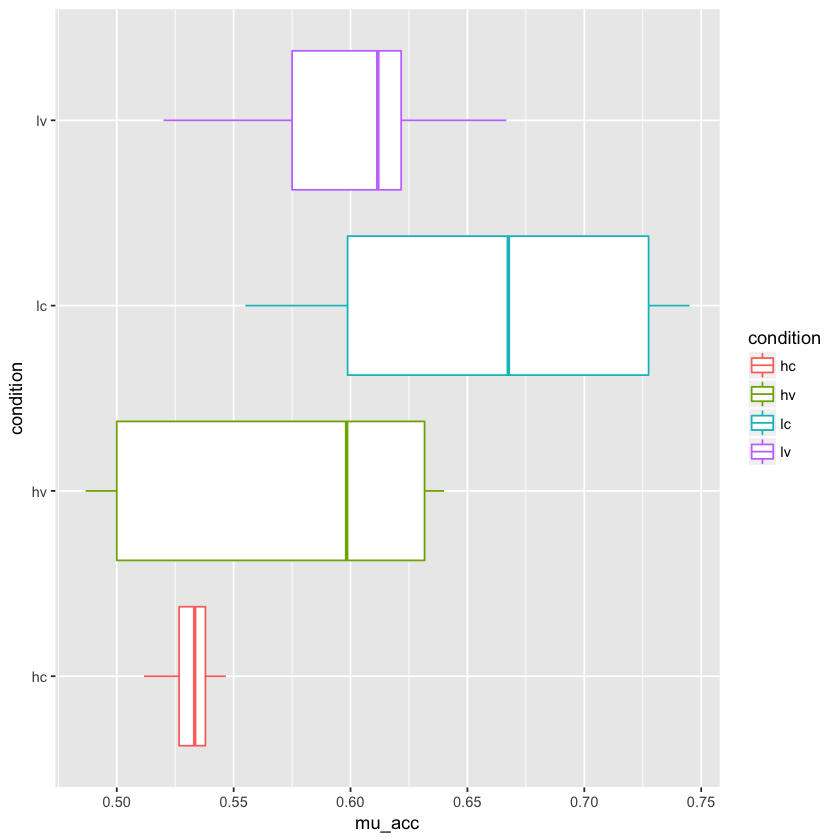

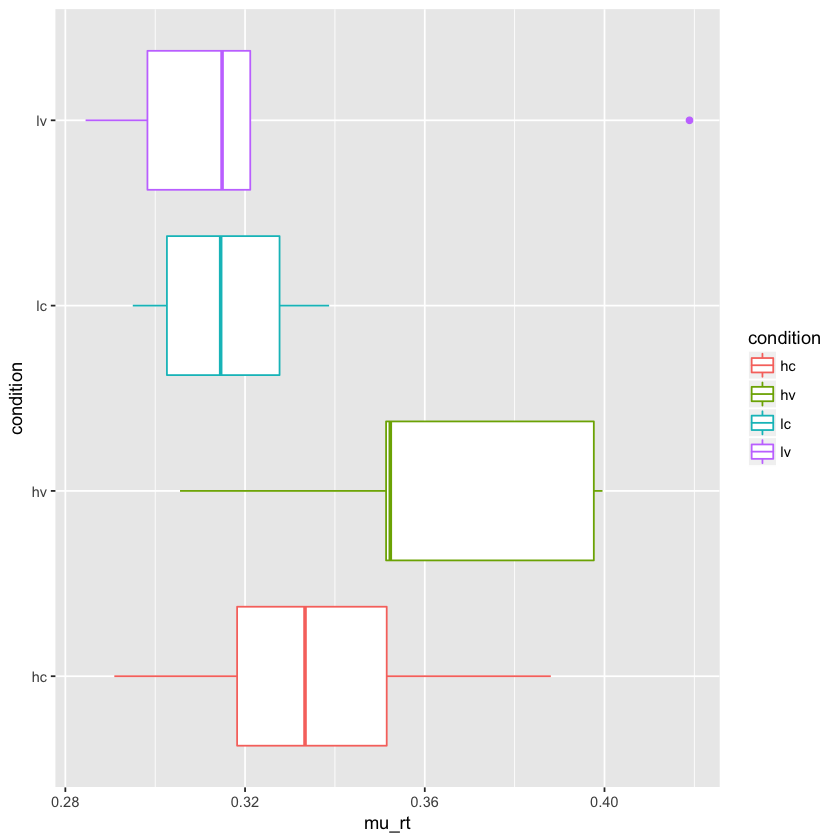

In [13]:
acc_stats <- sparse_df %>% 
    group_by(ID, condition) %>% summarize(mu_acc=mean(accuracy))

rt_stats <- sparse_df %>% 
    group_by(ID, condition) %>% summarize(mu_rt=mean(rt))

sim_acc_stats <- simulations %>% 
    group_by(ID, condition) %>% summarize(mu_acc=mean(accuracy))

sim_rt_stats <- simulations %>% 
    group_by(ID, condition) %>% summarize(mu_rt=mean(rt))

# ggplot(acc_stats, aes(mu_acc, ID)) +
#     geom_point(aes(fill=condition)) + coord_flip()

ggplot(acc_stats, aes(x=condition, y=mu_acc)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

ggplot(rt_stats, aes(x=condition, y=mu_rt)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

In [ ]:
ggplot(simulations, aes(rt,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + facet_grid(condition ~.) + ggtitle('Simulated reaction time distributions ') 
# + theme_tufte()
# ggsave('s_rt_dist.pdf')

Picking joint bandwidth of 0.0137


Saving 7 x 7 in image
Picking joint bandwidth of 0.0137


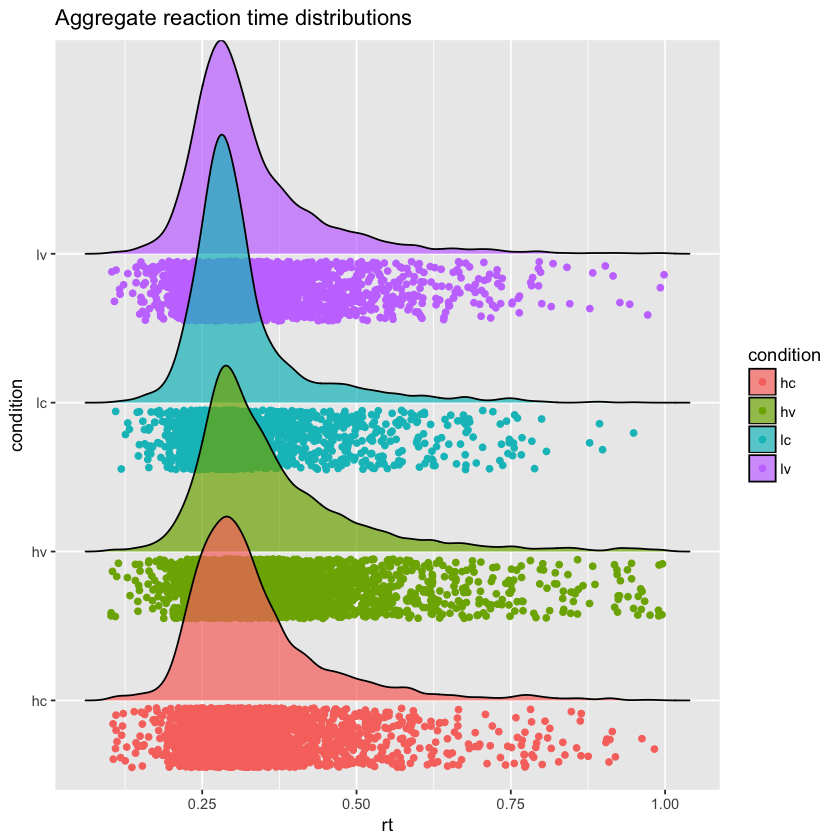

In [14]:
ggplot(sparse_df, aes(rt,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + ggtitle('Aggregate reaction time distributions ')

ggsave('condition_rt_dist.pdf')

Picking joint bandwidth of 0.118
Picking joint bandwidth of 0.12
Picking joint bandwidth of 0.125
Picking joint bandwidth of 0.124
Picking joint bandwidth of 0.122


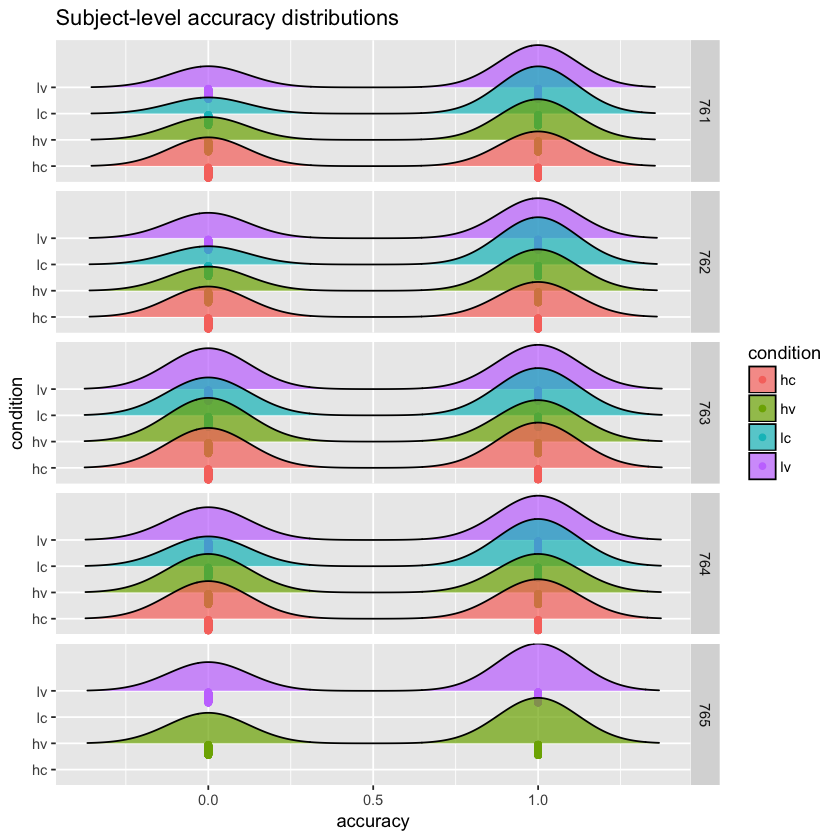

In [15]:
ggplot(sparse_df, aes(accuracy,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + facet_grid(ID ~.) + ggtitle('Subject-level accuracy distributions ')

Picking joint bandwidth of 0.0909


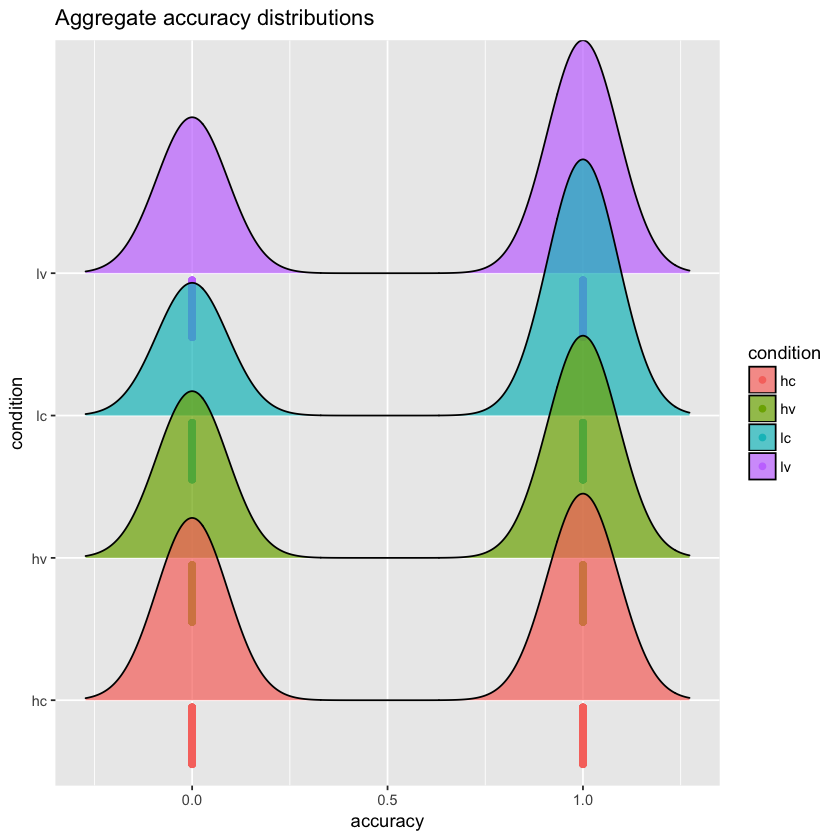

In [16]:
ggplot(sparse_df, aes(accuracy,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) +  ggtitle('Aggregate accuracy distributions ')

In [17]:
#step 1: find the indices that correspond to the changepoint 
cp_idx <- which(clean_df$cp_with_slow_fast == 1)
#get trial before cp 
start_idx <- cp_idx - 1 
#add e. length  
end_idx <- cp_idx + 9

#construct intervals according to the start and end idx 
intervals <- mapply(seq, start_idx, end_idx)
conditions <- data.frame(condition=clean_df$condition[start_idx])
dim(conditions)

conditions_vec <- rep(conditions$condition, each=11)
rt_vec_slice <- clean_df$rt[intervals]
acc_vec_slice <- clean_df$accuracy[intervals]
# new_df = data.frame(t=conditions_vec)
# tail(new_df)

[1] 468   1

In [18]:
#check intervals
start_idx[3]
end_idx[3]
intervals[,3]
#next, construct new df with these vals. 

#interval columns are cps
#rows are trials

[1] 104

[1] 114

[1] 104 105 106 107 108 109 110 111 112 113 114

In [19]:
#this is collapsed across conditions 
#just a test of indexing 
rt_vec <- 1:nrow(intervals)
acc_vec <- 1:nrow(intervals)

for (idx in 1:nrow(intervals)){
    rt_vec[idx] = mean(simulations[intervals[idx,], 'rt'],na.rm = TRUE)
    acc_vec[idx] = mean(simulations[intervals[idx,], 'accuracy'],na.rm = TRUE)
}

print(rt_vec); print(acc_vec)

 [1] 0.3505385 0.3487692 0.3431880 0.3430000 0.3528547 0.3496496 0.3537778
 [8] 0.3446496 0.3538291 0.3603504 0.3664274
 [1] 0.6474359 0.6474359 0.6709402 0.6794872 0.6260684 0.6645299 0.6367521
 [8] 0.6495726 0.5940171 0.6410256 0.6452991


In [21]:
sliced_df <- melt(intervals)
colnames(sliced_df) <- c('epoch_trial', 'interval_number', 'trial')
head(sliced_df)
sliced_df$interval_number <- NULL 
str(sliced_df)


sliced_df$conditions <- conditions_vec
sliced_df$rt <- rt_vec_slice
sliced_df$acc <- acc_vec_slice

dim(sliced_df)
head(sliced_df)

epoch_trial,interval_number,trial
1,1,30
2,1,31
3,1,32
4,1,33
5,1,34
6,1,35


'data.frame':	5148 obs. of  2 variables:
 $ epoch_trial: int  1 2 3 4 5 6 7 8 9 10 ...
 $ trial      : int  30 31 32 33 34 35 36 37 38 39 ...


[1] 5148    5

epoch_trial,trial,conditions,rt,acc
1,30,lv,0.2431149,1
2,31,lv,0.2474680,0
3,32,lv,0.2575409,0
4,33,lv,0.2806351,0
5,34,lv,0.2706201,1
6,35,lv,0.2353330,1


In [22]:
lc <- sliced_df %>%
          filter(conditions =='lc')  

hc <- sliced_df %>%
          filter(conditions =='hc')  

lv <- sliced_df %>%
          filter(conditions =='lv')  
hv <- sliced_df %>%
          filter(conditions =='hv')  


lc_rt_vec = c(1:nrow(intervals))
hc_rt_vec = c(1:nrow(intervals))
hv_rt_vec = c(1:nrow(intervals))
lv_rt_vec = c(1:nrow(intervals))


lc_acc_vec = c(1:nrow(intervals))
hc_acc_vec = c(1:nrow(intervals))
hv_acc_vec = c(1:nrow(intervals))
lv_acc_vec = c(1:nrow(intervals))

for (idx in 1:nrow(intervals)){
lc_rt_vec[idx] <- mean(lc[lc$epoch_trial == idx, 'rt'], na.rm = TRUE)  
hc_rt_vec[idx] <- mean(hc[hc$epoch_trial == idx, 'rt'],na.rm = TRUE)   
hv_rt_vec[idx] <- mean(hv[hv$epoch_trial == idx, 'rt'],na.rm = TRUE)   
lv_rt_vec[idx] <- mean(lv[lv$epoch_trial == idx, 'rt'],na.rm = TRUE)  
    
lc_acc_vec[idx] <- mean(lc[lc$epoch_trial == idx, 'acc'],na.rm = TRUE)  
hc_acc_vec[idx] <- mean(hc[hc$epoch_trial == idx, 'acc'],na.rm = TRUE)   
hv_acc_vec[idx] <- mean(hv[hv$epoch_trial == idx, 'acc'],na.rm = TRUE)   
lv_acc_vec[idx] <- mean(lv[lv$epoch_trial == idx, 'acc'],na.rm = TRUE)  
}

acc_df <- data.frame(lc_acc_vec, hc_acc_vec,hv_acc_vec, lv_acc_vec)
rt_df <- data.frame(lc_rt_vec, hc_rt_vec,hv_rt_vec, lv_rt_vec)

In [78]:
gg_df_acc <- stack(acc_df)
gg_df_acc$ind <- sub("^(hc).*", "hc", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(lc).*", "lc", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(hv).*", "hv", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(lv).*", "lv", gg_df_acc$ind)
colnames(gg_df_acc) <- c('accuracy', 'condition')


In [82]:
gg_df_rt <- stack(rt_df)
gg_df_rt$ind <- sub("^(hc).*", "hc", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(lc).*", "lc", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(hv).*", "hv", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(lv).*", "lv", gg_df_rt$ind)
colnames(gg_df_rt) <- c('rt', 'condition')

In [89]:
gg_df <- cbind(gg_df_acc, gg_df_rt)
gg_df$trial <- rep(seq(1,11),4)
head(gg_df,12)

accuracy,condition,rt,condition,trial
0.6421053,lc,0.3104417,lc,1
0.3263158,lc,0.3239659,lc,2
0.4105263,lc,0.3117273,lc,3
0.5473684,lc,0.3530838,lc,4
0.6736842,lc,0.3260081,lc,5
0.6631579,lc,0.3096886,lc,6
0.6315789,lc,0.3204493,lc,7
0.6000000,lc,0.3207768,lc,8
0.7368421,lc,0.3105059,lc,9
0.7894737,lc,0.3184157,lc,10


In [157]:
conflict_rt_plt <- ggplot(subset(gg_df, condition=='hc'| condition=='lc'), aes(x=trial,y=rt, color=condition)) + geom_point() + geom_line()+ ylim(0.25,0.45) +  geom_vline(xintercept=2)
conflict_acc_plt <- ggplot(subset(gg_df, condition=='hc'| condition=='lc'), aes(x=trial,y=accuracy, color=condition)) + geom_point() + geom_line()+ ylim(0,1) +  geom_vline(xintercept=2) + geom_hline(yintercept = 0.65, color='red', alpha=0.5) + geom_hline(yintercept = 0.85, color='blue', alpha=0.5)

In [154]:
vol_rt_plt <- ggplot(subset(gg_df, condition=='hv'| condition=='lv'), aes(x=trial,y=rt, color=condition)) + geom_point() + geom_line()+ ylim(0.25,0.45) +  geom_vline(xintercept=2)
vol_acc_plt <- ggplot(subset(gg_df, condition=='hv'| condition=='lv'), aes(x=trial,y=accuracy, color=condition)) + geom_point() + geom_line()+ ylim(0,1) +  geom_vline(xintercept=2) + geom_hline(yintercept = 0.75, color='gray')

## Conflict time series 

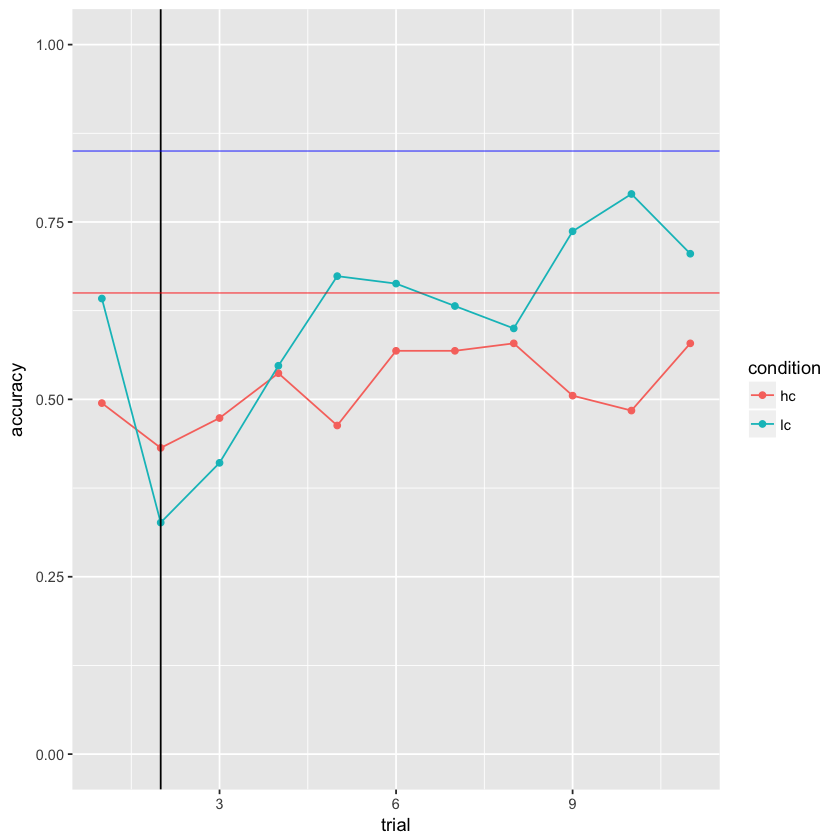

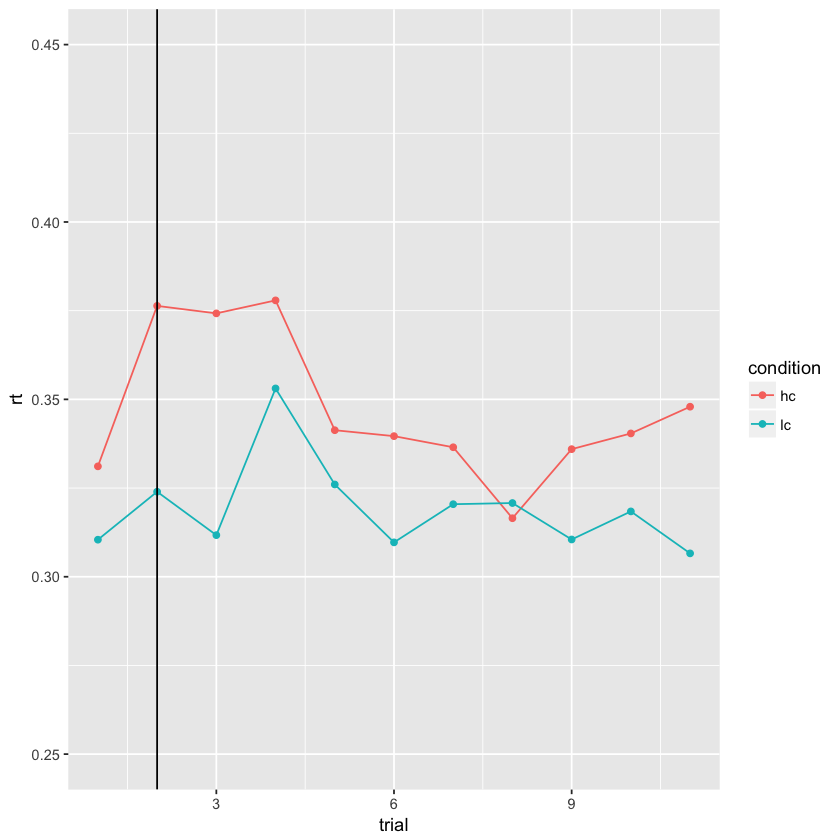

In [160]:
 conflict_acc_plt;conflict_rt_plt

## Volatility time series

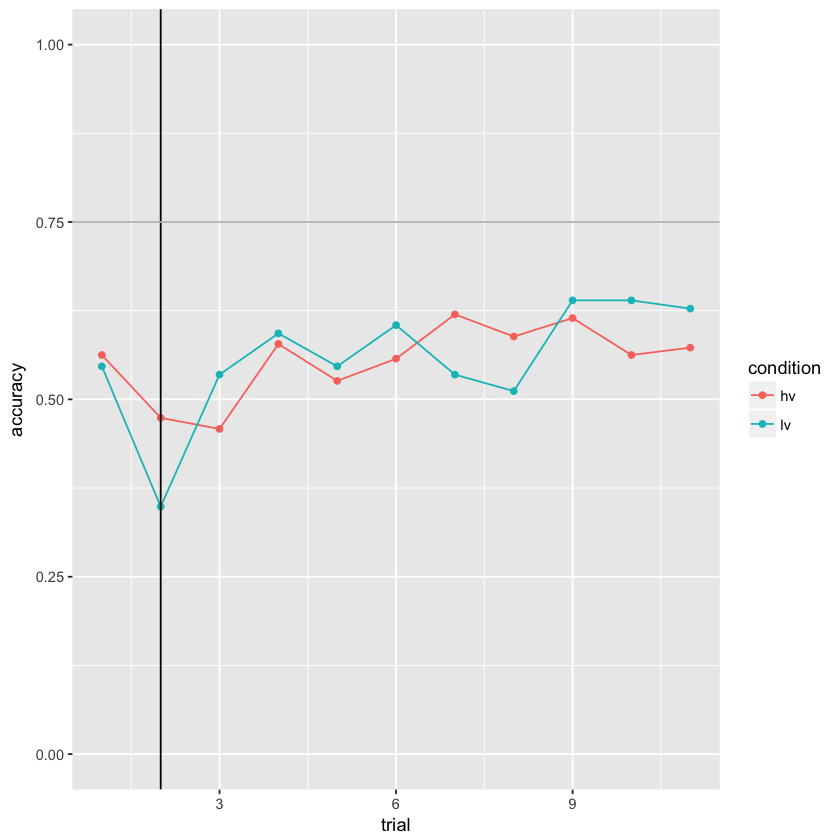

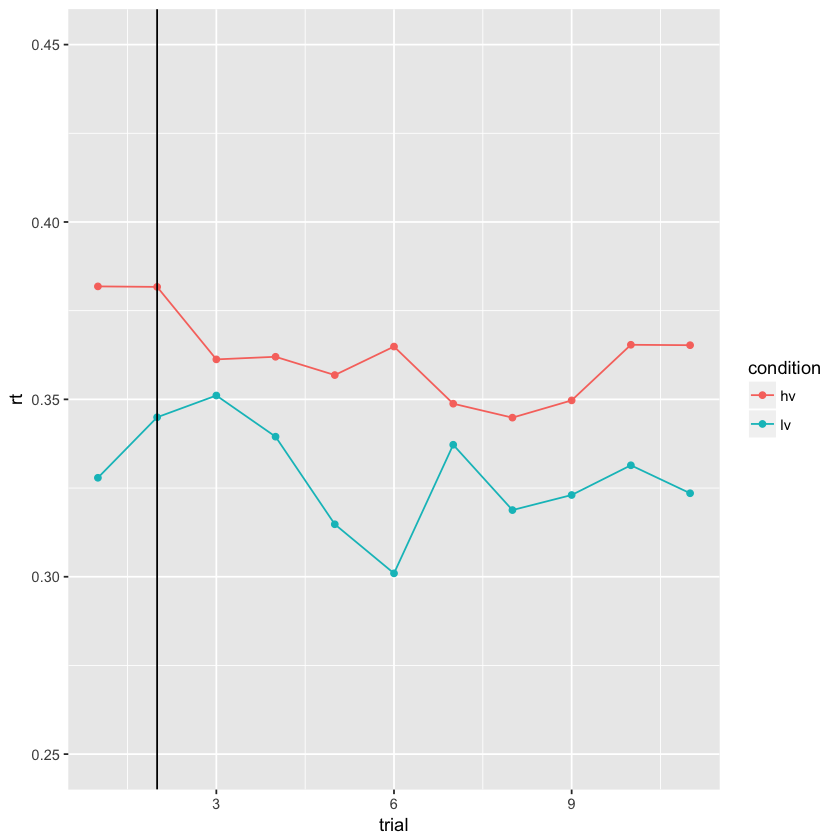

In [161]:
vol_acc_plt;vol_rt_plt

## Bootstrapped distributions of point estimates for behavior (mu accuracy, rt) 
### Note that this is currently over all trials. Need to bootstrap the average for each time point in the series that I'm plotting for nonparametric CIs.

In [25]:
setwd('/Users/Krista/Documents/R/functions')
source("bootstrap.R")

In [26]:
# would have been elegant but doesn't work as is
# condition_rt.boot <- sparse_df %>%  
#     group_by(condition)  %>% select(rt) %>% map(boot.mean)

In [27]:
hc_rt.boot <- boot.mean(sparse_df[which(sparse_df$condition=='hc'), 'rt'])
lc_rt.boot <- boot.mean(sparse_df[which(sparse_df$condition=='lc'), 'rt'])

hv_rt.boot <- boot.mean(sparse_df[which(sparse_df$condition=='hv'), 'rt'])
lv_rt.boot <- boot.mean(sparse_df[which(sparse_df$condition=='lv'), 'rt'])

In [28]:
hc_acc.boot <- boot.mean(sparse_df[which(sparse_df$condition=='hc'), 'accuracy'])
lc_acc.boot <- boot.mean(sparse_df[which(sparse_df$condition=='lc'), 'accuracy'])

hv_acc.boot <- boot.mean(sparse_df[which(sparse_df$condition=='hv'), 'accuracy'])
lv_acc.boot <- boot.mean(sparse_df[which(sparse_df$condition=='lv'), 'accuracy'])

In [29]:
hc_rt.boot$interval; lc_rt.boot$interval
hc_acc.boot$interval; lc_acc.boot$interval

[1] 0.3316371 0.3411881

[1] 0.3117065 0.3197239

[1] 0.5096747 0.5528253

[1] 0.639141 0.678359

In [30]:
hv_rt.boot$interval; lv_rt.boot$interval
hv_acc.boot$interval; lv_acc.boot$interval

[1] 0.3564817 0.3660896

[1] 0.3235491 0.3315466

[1] 0.5526743 0.5899923

[1] 0.5819202 0.6160798

In [31]:
#want to overlay bootstrapped distributions for counter conditions 
conflict_rt.boot <- data.frame(stack(c(hc_rt_boot = hc_rt.boot$boot.statistics, lc_rt_boot=lc_rt.boot$boot.statistics)))
colnames(conflict_rt.boot) = c('bootstrapped_rt', 'condition')
conflict_rt.boot$condition <- sub("^(hc).*", "hc", conflict_rt.boot$condition)
conflict_rt.boot$condition <- sub("^(lc).*", "lc", conflict_rt.boot$condition)

In [38]:
conflict_acc.boot <- data.frame(stack(c(hc_acc_boot = hc_acc.boot$boot.statistics, lc_acc_boot=lc_acc.boot$boot.statistics)))
colnames(conflict_acc.boot) = c('bootstrapped_acc', 'condition')
conflict_acc.boot$condition <- sub("^(hc).*", "hc", conflict_acc.boot$condition)
conflict_acc.boot$condition <- sub("^(lc).*", "lc", conflict_acc.boot$condition)

In [39]:
#volatility bootstrapping 
vol_rt.boot <- data.frame(stack(c(hv_rt_boot = hv_rt.boot$boot.statistics, lv_rt_boot=lv_rt.boot$boot.statistics)))
colnames(vol_rt.boot) = c('bootstrapped_rt', 'condition')
vol_rt.boot$condition <- sub("^(hv).*", "hv", vol_rt.boot$condition)
vol_rt.boot$condition <- sub("^(lv).*", "lv", vol_rt.boot$condition)

In [40]:
vol_acc.boot <- data.frame(stack(c(hv_acc_boot = hv_acc.boot$boot.statistics, lv_acc_boot=lv_acc.boot$boot.statistics)))
colnames(vol_acc.boot) = c('bootstrapped_acc', 'condition')
vol_acc.boot$condition <- sub("^(hv).*", "hv", vol_acc.boot$condition)
vol_acc.boot$condition <- sub("^(lv).*", "lv", vol_acc.boot$condition)

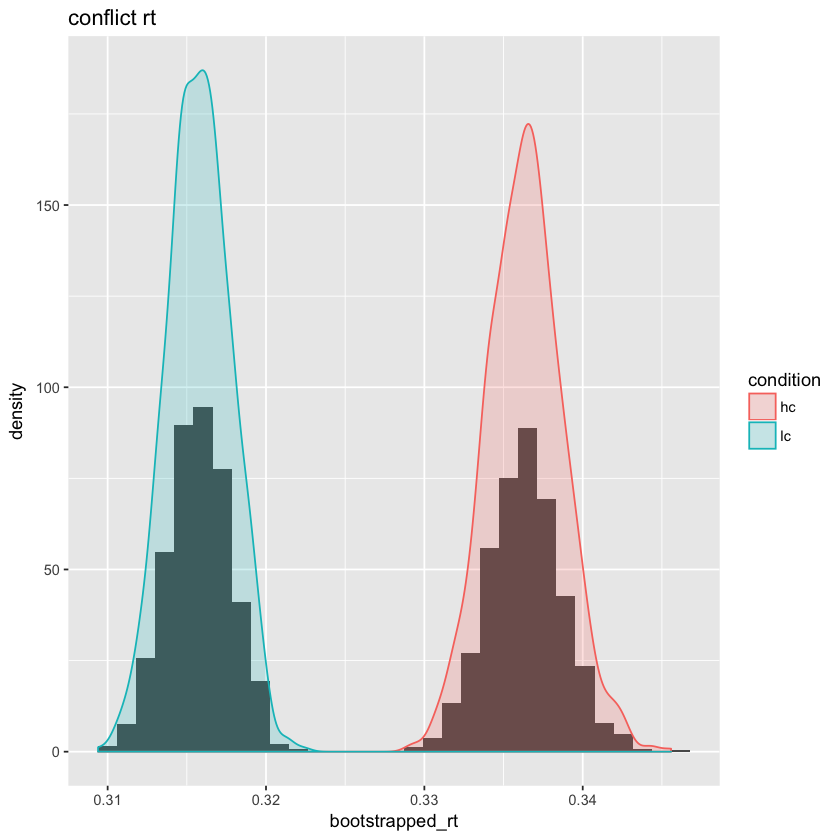

In [49]:
binwidth = diff(range(conflict_rt.boot$bootstrapped_rt))/30
ggplot(conflict_rt.boot, aes(x=bootstrapped_rt)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='conflict rt')

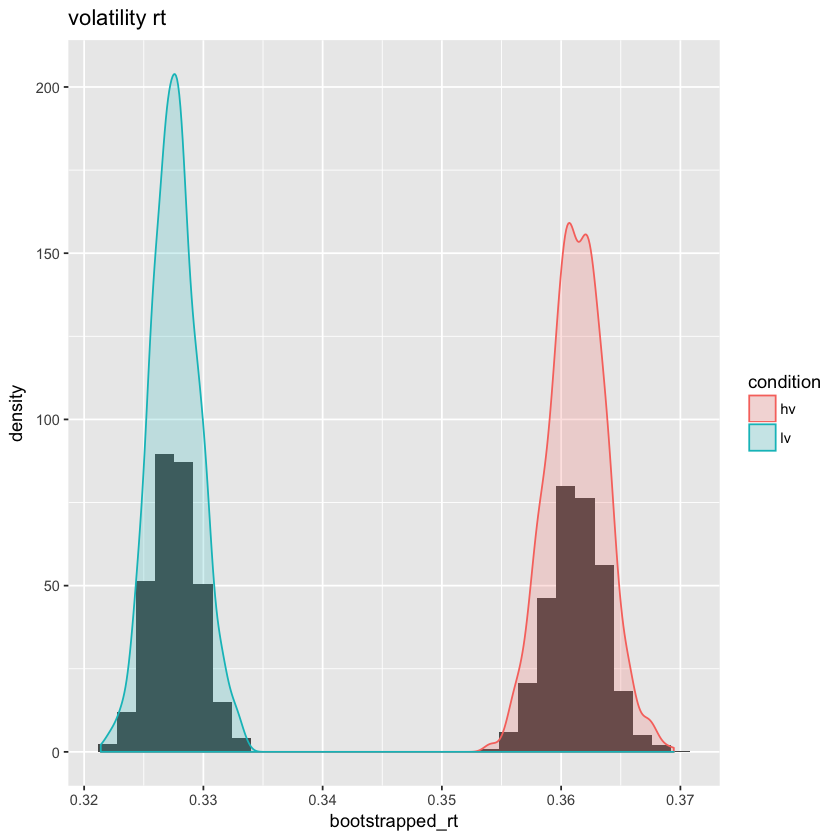

In [48]:
binwidth = diff(range(vol_rt.boot$bootstrapped_rt))/30
ggplot(vol_rt.boot, aes(x=bootstrapped_rt)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='volatility rt')

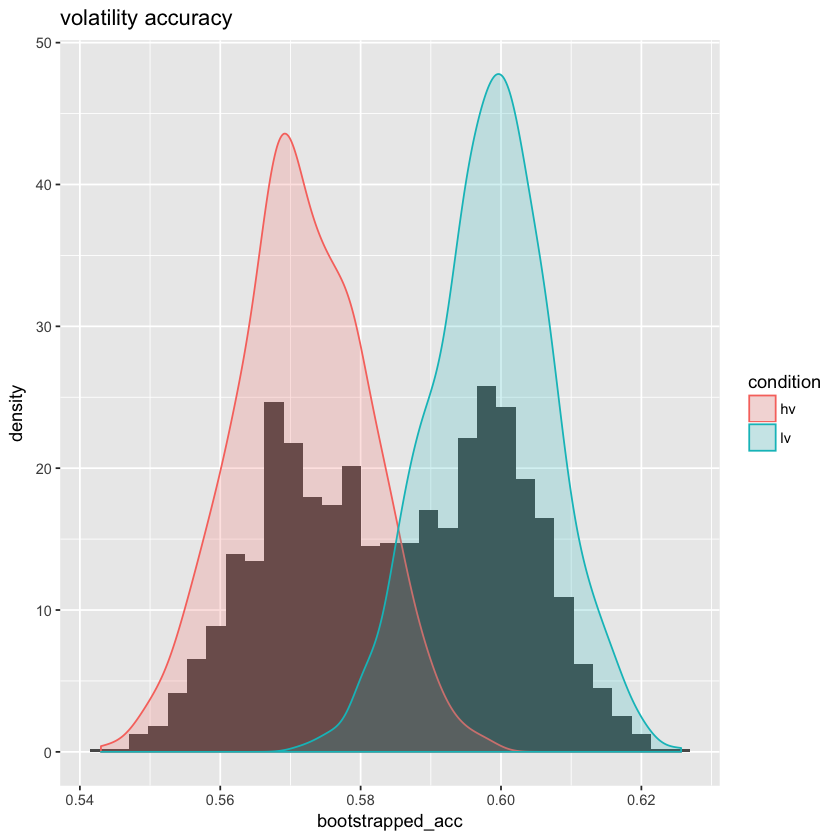

In [45]:
binwidth = diff(range(vol_acc.boot$bootstrapped_acc))/30
ggplot(vol_acc.boot, aes(x=bootstrapped_acc)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='volatility accuracy')

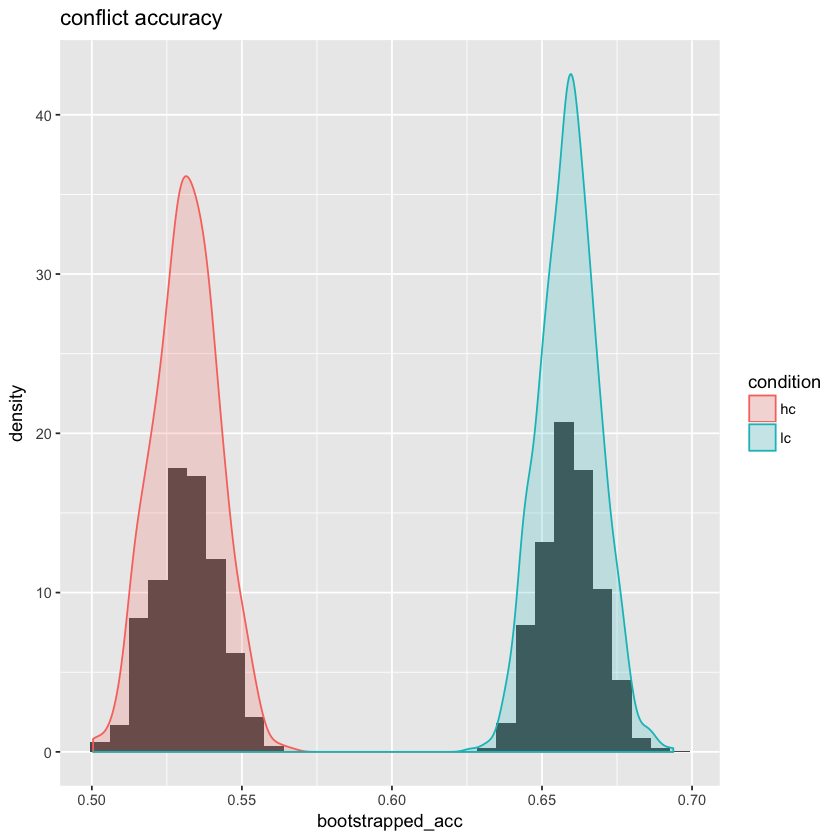

In [47]:
binwidth = diff(range(conflict_acc.boot$bootstrapped_acc))/30
ggplot(conflict_acc.boot, aes(x=bootstrapped_acc)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='conflict accuracy')

## bootstrapping example

In [ ]:
library(Lock5Data)
data(CommuteAtlanta)

In [ ]:
str(CommuteAtlanta)

In [ ]:
#find sample mean first
(time.mean = with(CommuteAtlanta, mean(Time)))

In [ ]:
#finding se 
#sample with replacement to form a matrix with one row for each bootstrap sample 
#and one column for each sampled value, matching original n
n_bootstrap_samples = 1000
n_sampled_vals = nrow(CommuteAtlanta)
boot.samples = matrix(sample(CommuteAtlanta$Time, size = n_bootstrap_samples * n_sampled_vals, replace = TRUE),
n_bootstrap_samples, n_sampled_vals)

In [ ]:
#now take average of each row of boot samples 
boot.statistics = apply(boot.samples, 1, mean)

In [ ]:
#visualize bootstrapped distribution of means
ggplot(data.frame(meanTime = boot.statistics),aes(x=meanTime)) +
geom_histogram(binwidth=0.25,aes(y=..density..)) +
geom_density(color="red")

In [ ]:
#find se of bootstrapped mean (std of dist. of means)
(time.se = sd(boot.statistics))

In [ ]:
#calc. bootstrapped confidence interval 
me = ceiling(10 * 2 * time.se)/10
round(time.mean, 1) + c(-1, 1) * me